### FashionMNIST classifier based on SVM

-FashionMNIST is a dataset of grayscale images of 28x28 pixels representing 10 categories of clothing items.

-This notebook uses SVM to classify the ten categories of FashionMNIST.

### 运行说明：
### 该笔记需要python环境，环境中需确保有numpy  sklearn  matplotlib  torchvision库

==============================================================================================================================================================

In [6]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import PCA

In [7]:
# 数据准备
def load_fashion_mnist():
    # 加载数据集
    train_dataset = FashionMNIST(root='fmnist_data/', train=True, download=True)
    test_dataset = FashionMNIST(root='fmnist_data/', train=False, download=True)
    
    # 转换为numpy数组
    X_train = train_dataset.data.numpy().reshape(-1, 28*28)
    y_train = train_dataset.targets.numpy()
    X_test = test_dataset.data.numpy().reshape(-1, 28*28)
    y_test = test_dataset.targets.numpy()
    
    # 特征缩放
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # 使用PCA降维以加快SVM训练
    pca = PCA(n_components=100)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    return X_train, X_test, y_train, y_test

# 加载数据
X_train, X_test, y_train, y_test = load_fashion_mnist()
print("训练数据形状:", X_train.shape)
print("测试数据形状:", X_test.shape)

# 类别名称
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

训练数据形状: (60000, 100)
测试数据形状: (10000, 100)


In [8]:
# 训练SVM模型
def train_svm():
    # 创建线性SVM分类器
    svm = LinearSVC(
        C=1.0,                # 正则化参数
        multi_class='ovr',    # 一对多分类策略
        max_iter=2000,        # 最大迭代次数
        random_state=42
    )
    
    # 训练模型
    print("开始训练SVM模型...")
    start_time = time.time()
    svm.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f"训练完成！用时: {training_time:.2f} 秒")
    
    return svm

# 评估模型
def evaluate_svm(model):
    # 在测试集上预测
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    
    print("\n模型评估结果:")
    print(f"准确率: {accuracy:.4f}")
    print(f"预测用时: {prediction_time:.2f} 秒")
    print("\n详细分类报告:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    return y_pred

In [9]:
# 降维可视化
def plot_2d_visualization(X, y, title="2D Data Visualization"):
    # 使用PCA将数据降至2维用于可视化
    pca_vis = PCA(n_components=2)
    X_2d = pca_vis.fit_transform(X)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', alpha=0.6)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

# 混淆矩阵可视化
def plot_confusion_matrix(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

开始训练SVM模型...
训练完成！用时: 36.44 秒

模型评估结果:
准确率: 0.8295
预测用时: 0.00 秒

详细分类报告:
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.80      0.79      1000
     Trouser       0.97      0.95      0.96      1000
    Pullover       0.72      0.71      0.72      1000
       Dress       0.80      0.87      0.83      1000
        Coat       0.70      0.76      0.73      1000
      Sandal       0.93      0.91      0.92      1000
       Shirt       0.62      0.48      0.54      1000
     Sneaker       0.90      0.93      0.91      1000
         Bag       0.92      0.94      0.93      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

绘制训练数据的2D可视化...


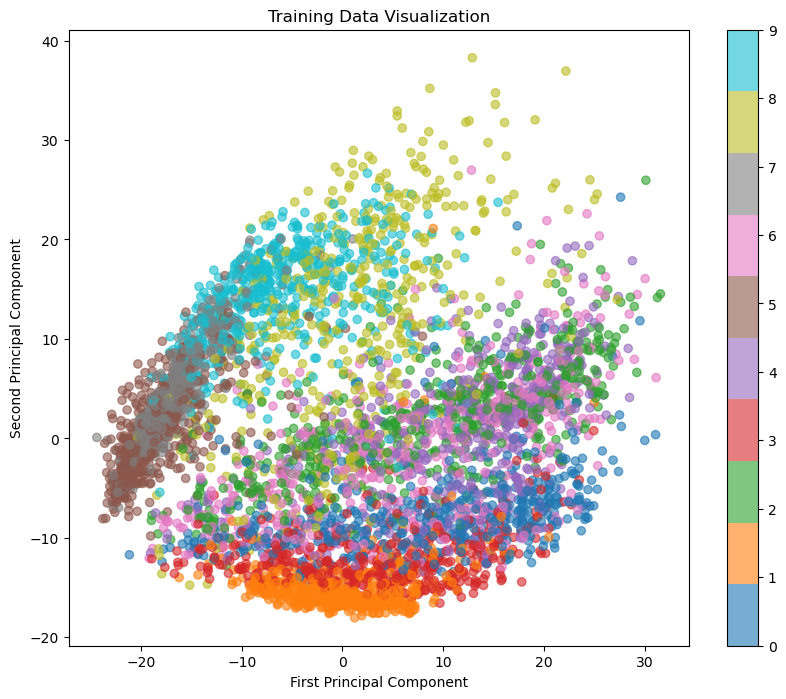

绘制混淆矩阵...


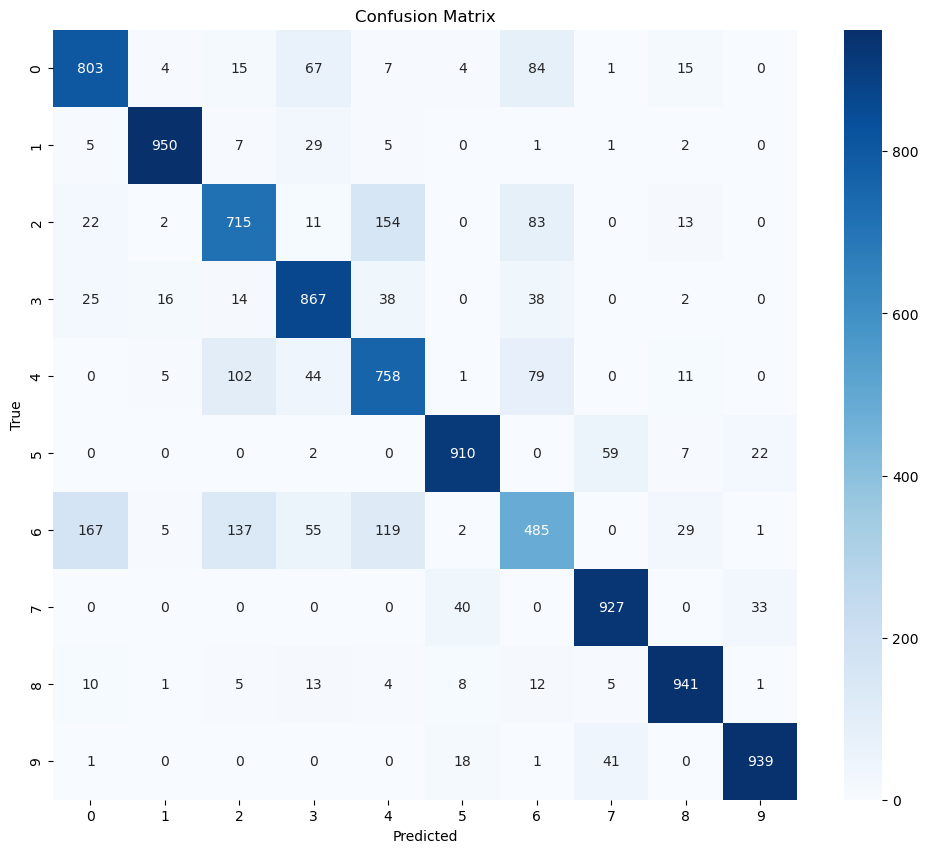

In [10]:
# 训练模型
svm_model = train_svm()

# 评估模型
y_pred = evaluate_svm(svm_model)

# 数据可视化
sample_size = 5000
indices = np.random.choice(len(X_train), sample_size, replace=False)
print("绘制训练数据的2D可视化...")
plot_2d_visualization(X_train[indices], y_train[indices], "Training Data Visualization")

# 绘制混淆矩阵
print("绘制混淆矩阵...")
plot_confusion_matrix(y_test, y_pred)